In [2]:
from qem.image_fitting import ImageModelFitting
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
# %matplotlib qt

# file = '/home/zzhang/OneDrive/code/qem/data/STO/adf_average_STO.txt'

# image = np.loadtxt(file)
file = '/home/zzhang/OneDrive/data/Nico/28.03.2024-STOonSTO21mrad/83-100/aligned_hdf5/1859 HAADF 33.7 nm.emd.hspy'
# file ='/home/zzhang/OneDrive/data/Nico/28.03.2024-STOonSTO21mrad/84-100/aligned_hdf5/1932 HAADF 33.7 nm.emd.hspy'

s = hs.load(file)
image = s.data
# image = np.load(file)
# dx= 0.1645429228960236	
dx = s.axes_manager[1].scale *10
# dx = 0.36254824166962796
model=ImageModelFitting(image, dx=dx,units='A')

# get the unique coordinates by row
# input_coordinates = np.unique(input_coordinates, axis=0)

INFO:root:Elements: ['Sr', 'Ti', 'O'], the order is used for the atom types. Please initiate the correct elements in your system.


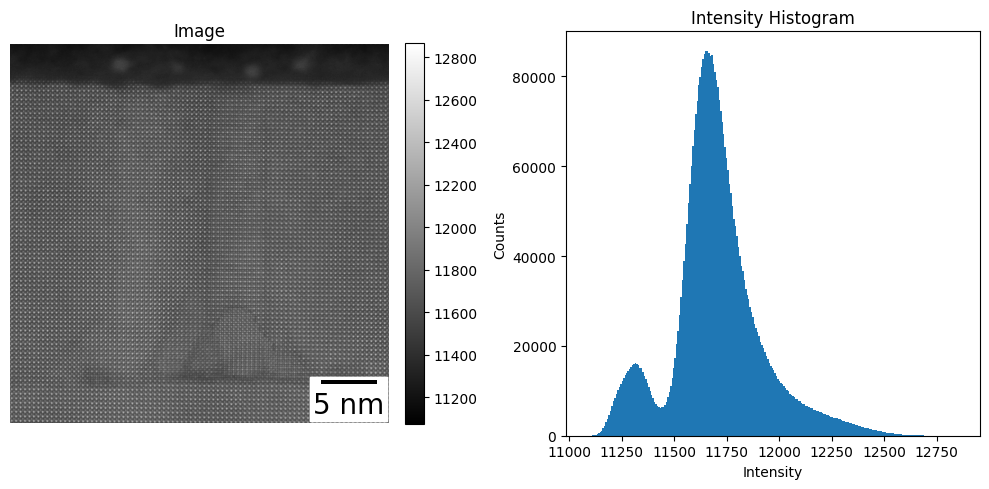

In [3]:
model.plot()

In [10]:
model.find_peaks(min_distance=10,threshold_abs=11600,threshold_rel=0.05)

# model.select_region(invert_selection=False)

INFO:root:Updated peak locations.


array([[ 613., 1575.],
       [ 907.,  820.],
       [ 396., 1306.],
       ...,
       [ 917.,  121.],
       [1421.,  206.],
       [1586.,  121.]])

In [12]:
cif_file = '/home/zzhang/OneDrive/code/qem/data/STO/SrTiO3_mp-5229_conventional_standard.cif'
model.map_lattice(cif_file=cif_file,elements=['Sr','Ti'],min_distance=20, reciprocal=True)

INFO:root:Origin selected: [1736. 1335.]
INFO:root:Vector a selected: [24.  1.]
INFO:root:Vector b selected: [ -1. -24.]
INFO:root:In pixel: Origin: [1736. 1335.], Vector a: [24.  1.], Vector b: [ -1. -24.]
INFO:root:In space: Origin: [285.64651415 219.66480207] A, Vector a: [3.94903015 0.16454292] A, Vector b: [-0.16454292 -3.94903015] A
INFO:root:Origin selected: [1024. 1024.]
INFO:root:Vector a selected: [84.  0.]
INFO:root:Vector b selected: [ 0. 84.]
INFO:root:In pixel: Origin: [1024. 1024.], Vector a: [84.  0.], Vector b: [ 0. 84.]
INFO:root:In space: Origin: [3.03872079 3.03872079] 1/A, Vector a: [0.24927006 0.        ] 1/A, Vector b: [0.         0.24927006] 1/A
INFO:root:FFT real a: [24.38095238  0.        ] pixel, Real b: [ 0.         24.38095238] pixel
INFO:root:FFT real a: [4.01171317 0.        ] A, Real b: [0.         4.01171317] A


In [5]:
model.add_or_remove_peaks(min_distance=10)

Updated peak locations.


array([[  13.80952381,  176.80952381],
       [  14.        ,  201.61904762],
       [  20.19047619, 1878.19047619],
       ...,
       [2043.19047619,  469.19047619],
       [2043.19047619,  543.19047619],
       [2043.19047619,  592.19047619]])

In [11]:
model.select_region()

INFO:root:Selected 6386 atoms out of 6616 atoms.


In [5]:
model.plot_coordinates()

In [13]:
model.fit_background = True
params = model.init_params()
model.fit_random_batch(params, batch_size=1000, maxiter=50, tol=1e-3, plot=False, step_size=0.01,verbose=False,num_epoch=1)

Fitting random batch:   0%|          | 0/13 [00:00<?, ?it/s]

In [12]:
model.plot_fitting()

In [14]:
plt.figure()
plt.hist(model.volume[model.atom_types==0], bins=100, alpha=0.5,label='Sr')
plt.hist(model.volume[model.atom_types==1], bins=100, alpha=0.5,label='Ti')
plt.legend()

In [7]:
model.plot_scs(per_element=True)

In [15]:
model.plot_scs_histogram()

In [1]:
import numpy as np

# Sample array
arr = np.array([2, 3, 2, 1, 3, 1, 4])

# Get unique values, indices of first occurrence, and inverse mapping
unique_values, first_indices, inverse_indices = np.unique(arr, return_index=True, return_inverse=True)

# Create a dictionary to store the indices of all occurrences for each unique value
occurrences = {value: np.where(inverse_indices == i)[0] for i, value in enumerate(unique_values)}

print("Unique values:", unique_values)
print("Indices of first occurrence:", first_indices)
print("Indices of all occurrences for each unique value:", occurrences)


Unique values: [1 2 3 4]
Indices of first occurrence: [3 0 1 6]
Indices of all occurrences for each unique value: {1: array([3, 5]), 2: array([0, 2]), 3: array([1, 4]), 4: array([6])}


In [3]:
clusters

array([1, 1, 1, 1, 2, 2, 3], dtype=int32)

In [2]:
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage

# Sample array with values that need tolerance larger than 1
arr = np.array([1, 2, 2.5, 3.2, 10, 10.5, 15])

# Set the desired tolerance (e.g., values within 3 units are considered the same)
tolerance = 3

# Perform hierarchical clustering
Z = linkage(arr[:, None], method='single', metric='euclidean')

# Create clusters based on the tolerance
clusters = fcluster(Z, t=tolerance, criterion='distance')

# Find unique cluster labels and indices of first occurrence
_, unique_indices = np.unique(clusters, return_index=True)

# Get unique values based on clusters
unique_values = arr[unique_indices]

print("Unique values with tolerance:", unique_values)
print("Indices of first occurrence:", unique_indices)


Unique values with tolerance: [ 1. 10. 15.]
Indices of first occurrence: [0 4 6]
